# Intro

In [72]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [73]:
#Take final dataset

df_EUR_M_cap=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_monthly_capitalization.csv')
df_EUR_M_RI=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_monthly_return.csv')
df_EUR_Y_cap=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_yearly_capitalization.csv')
df_EUR_Y_RI=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_yearly_return.csv')


Variable name :


df_EUR_M_cap : Monthly capitalization for EUR firms

df_EUR_M_RI: Monthly return index for EUR firms

df_EUR_Y_cap: Yearly capitalization for EUR firms

df_EUR_Y_RI: Yearly return index for EUR firms

df_M_returns: Monthly returns (computed with capitalization) for EUR firms

df_M_returns_annualized: Monthly returns annualized

df_M_volatility: Monthly volatility of EUR firms

df_M_volatility_annualized: Monthly volatility annualized



# Question 1

## Annualized average return

In [74]:
df_EUR_M_RI.set_index('NAME', inplace = True)
df_EUR_M_cap.set_index('NAME', inplace = True)

In [75]:

df_EUR_M_RI.drop(df_EUR_M_RI.columns[:4], axis=1, inplace=True)

df_EUR_M_RI.columns = pd.to_datetime(df_EUR_M_RI.columns)

df_EUR_M_RI_08 = df_EUR_M_RI.loc[:, (df_EUR_M_RI.columns >= pd.to_datetime("2007-01-01"))]

df_EUR_M_RI_T = df_EUR_M_RI_08.T

In [81]:
df_M_returns = df_EUR_M_RI_T.pct_change()

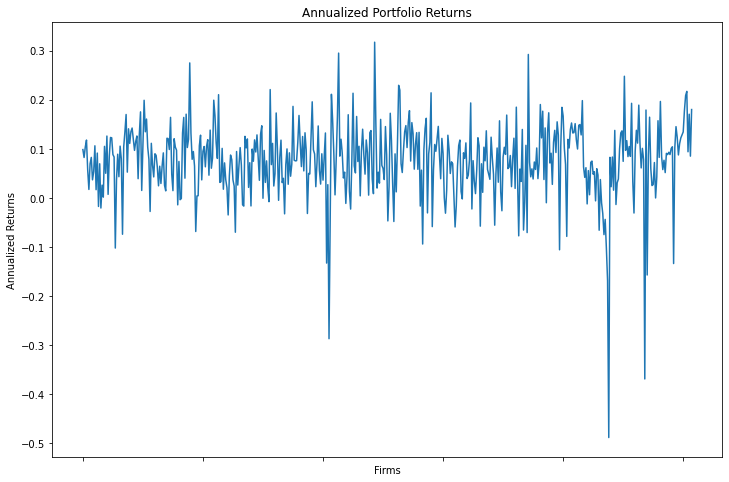

In [82]:
#Now we annualized it
df_M_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
df_M_returns_annualized = df_M_returns.mean() * 12
#And we plot it
plt.figure(figsize=(12, 8))  # Adjust the dimensions as needed
df_M_returns_annualized.plot()
plt.tick_params(axis='x', labelbottom=False)
plt.xlabel('Firms')
plt.ylabel('Annualized Returns')
plt.title('Annualized Portfolio Returns')
plt.show()

OptionError: No such keys(s): 'mode.use_inf_as_null'

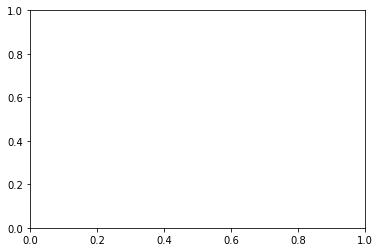

In [83]:
sns.histplot(df_M_returns_annualized)

## Annualized volatility

In [84]:
deviations = df_M_returns - df_M_returns.mean()
squared_deviations = deviations**2
mean_squared_deviations = squared_deviations.mean()

df_M_volatility = np.sqrt(mean_squared_deviations)

In [85]:
df_M_volatility_annualized = df_M_volatility*(12**0.5)

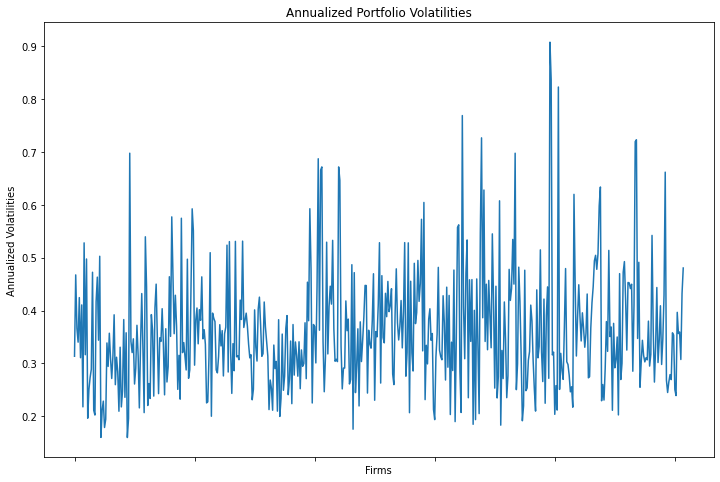

In [86]:
plt.figure(figsize=(12, 8))
df_M_volatility_annualized.plot()
plt.tick_params(axis='x', labelbottom=False)
plt.xlabel('Firms')
plt.ylabel('Annualized Volatilities')
plt.title('Annualized Portfolio Volatilities')
plt.show()

## Correlation

In [87]:
df_M_returns.corr()

NAME,FLUGHAFEN WIEN,ERSTE GROUP BANK,OMV,VERBUND,WIENERBERGER,VIENNA INSURANCE GROUP A,VOESTALPINE,MAYR-MELNHOF KARTON,IMMOFINANZ,SOLVAY,...,FABEGE,KINNEVIK B,INVESTOR A,SWEDISH MATCH DEAD - DELIST.02/01/23,HEXAGON B,NIBE INDUSTRIER,ELECTROLUX B,ATLAS COPCO A,MODERN TIMES GROUP MTG B,BOLIDEN ORD SHS
NAME,,,,,,,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,1.000000,0.563011,0.501616,0.499605,0.471449,0.623572,0.461207,0.563928,0.466917,0.491600,...,0.371786,0.422274,0.468797,0.285513,0.389913,0.334352,0.395925,0.395054,0.453418,0.334718
ERSTE GROUP BANK,0.563011,1.000000,0.601695,0.527919,0.612858,0.730205,0.529561,0.575977,0.516212,0.693561,...,0.462065,0.521617,0.661790,0.362114,0.532283,0.368265,0.508907,0.536500,0.503673,0.567557
OMV,0.501616,0.601695,1.000000,0.481892,0.437129,0.566825,0.550988,0.576954,0.516486,0.637158,...,0.413331,0.473772,0.480426,0.356773,0.411133,0.322863,0.426079,0.443856,0.421563,0.488802
VERBUND,0.499605,0.527919,0.481892,1.000000,0.410817,0.533057,0.475076,0.482957,0.436344,0.469756,...,0.439132,0.476935,0.525412,0.299445,0.438822,0.351009,0.317555,0.401171,0.375623,0.383349
WIENERBERGER,0.471449,0.612858,0.437129,0.410817,1.000000,0.627346,0.615369,0.528778,0.520221,0.652811,...,0.563730,0.608841,0.663237,0.251434,0.561712,0.518141,0.586415,0.621444,0.564434,0.434293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NIBE INDUSTRIER,0.334352,0.368265,0.322863,0.351009,0.518141,0.447080,0.435842,0.399629,0.406543,0.409717,...,0.466596,0.538200,0.577069,0.276464,0.570899,1.000000,0.449978,0.549947,0.424562,0.372856
ELECTROLUX B,0.395925,0.508907,0.426079,0.317555,0.586415,0.537329,0.570320,0.451120,0.441172,0.566379,...,0.512637,0.520470,0.671834,0.336836,0.645958,0.449978,1.000000,0.658460,0.475527,0.555120
ATLAS COPCO A,0.395054,0.536500,0.443856,0.401171,0.621444,0.596458,0.673897,0.521670,0.515376,0.641485,...,0.640817,0.631429,0.806049,0.335394,0.745823,0.549947,0.658460,1.000000,0.613623,0.639032


In [88]:
# Calculate the average returns for each asset
average_returns = df_M_returns.mean()

# Calculate the volatility (standard deviation) for each asset
volatilities = df_M_returns.std()

# Compute the correlation between average returns and volatilities
correlation = average_returns.corr(volatilities)
correlation

-0.2681976271125754

# Exercice 2

## Equally weighted portfolio

In [89]:
#Creating a vector with equal weights for the 508 firms
n_columns = 508

#df_weight = pd.DataFrame([1/n_columns] * n_columns).T

weight = 1/508

weight

0.001968503937007874

In [90]:
#Equally weighted portfolio (average returns of all firms per each month)
portfolio_returns_EW = (df_M_returns*weight).sum(axis=1)

portfolio_returns_EW.replace([np.inf, -np.inf], np.nan, inplace=True)
portfolio_returns_EW.dropna(inplace=True)


In [91]:
portfolio_returns_EW.index = pd.to_datetime(portfolio_returns_EW.index)

# Filter DataFrame based on the condition
filtered_df = portfolio_returns_EW['2007-12-31':]

In [92]:
EW_returns = filtered_df.pct_change()
EW_returns = EW_returns.dropna(axis=0)

EW_returns_avrg_ann = EW_returns.mean()*12
EW_returns_avrg_ann


-26.61150123173949

In [93]:
portfolio_vol_EW = portfolio_returns_EW.std()*np.sqrt(12)
portfolio_vol_EW

0.22666451290065046

In [94]:
rf_rate = pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/risk_free_rate_OECD.csv')
# Sharpe ratio with average EUR annualized risk free ratio from OECD euro zone

rfr = rf_rate.OBS_VALUE
avg_rfr = rfr.mean()/100

## Sharpe ratio EV_Portfolio

In [95]:
sr_ev = (EW_returns_avrg_ann - avg_rfr) / portfolio_vol_EW

In [96]:
sr_ev

-117.53487767961433

## Value weighted portfolio

In [97]:
df_EUR_M_cap.drop(df_EUR_M_cap.columns[:4], axis=1, inplace=True)

df_EUR_M_cap.columns = pd.to_datetime(df_EUR_M_cap.columns)

df_EUR_M_cap_08 = df_EUR_M_cap.loc[:, (df_EUR_M_cap.columns >= pd.to_datetime("2007-01-01"))]

df_EUR_M_cap_T = df_EUR_M_cap_08.T

weights = df_EUR_M_cap_T.div(df_EUR_M_cap.T.sum(axis=1), axis=0).mean()

weights

NAME
FLUGHAFEN WIEN              0.000249
ERSTE GROUP BANK            0.001761
OMV                         0.001728
VERBUND                     0.000858
WIENERBERGER                0.000300
                              ...   
NIBE INDUSTRIER             0.000544
ELECTROLUX B                0.000851
ATLAS COPCO A               0.002937
MODERN TIMES GROUP MTG B    0.000281
BOLIDEN ORD SHS             0.000692
Length: 508, dtype: float64

In [98]:
# Calculate weights for each month based on previous month's capitalization

total_cap_previous = df_EUR_M_cap.T.sum(axis=1)
weights = df_EUR_M_cap_T.div(total_cap_previous, axis=0).mean()

# Calculate the value-weighted portfolio returns
portfolio_returns_VW = (df_M_returns* weights).sum(axis=1)
portfolio_returns_VW

2007-01-31    0.000000
2007-02-28    0.000500
2007-03-31    0.036127
2007-04-30    0.067192
2007-05-31    0.018955
                ...   
2022-08-31   -0.053479
2022-09-30   -0.089615
2022-10-31    0.081919
2022-11-30    0.109852
2022-12-31    0.005090
Length: 192, dtype: float64

In [99]:
portfolio_returns_VW.index = pd.to_datetime(portfolio_returns_VW.index)

# Filter DataFrame based on the condition
filtered_df = portfolio_returns_VW['2007-12-31':]

In [100]:
VW_returns = filtered_df.pct_change()
VW_returns[VW_returns < 0] = 0
VW_returns_avrg_ann = VW_returns.mean()*12
VW_returns_avrg_ann

10.041923993856471

In [101]:
cov_m = df_M_returns.cov()
cov_m

NAME,FLUGHAFEN WIEN,ERSTE GROUP BANK,OMV,VERBUND,WIENERBERGER,VIENNA INSURANCE GROUP A,VOESTALPINE,MAYR-MELNHOF KARTON,IMMOFINANZ,SOLVAY,...,FABEGE,KINNEVIK B,INVESTOR A,SWEDISH MATCH DEAD - DELIST.02/01/23,HEXAGON B,NIBE INDUSTRIER,ELECTROLUX B,ATLAS COPCO A,MODERN TIMES GROUP MTG B,BOLIDEN ORD SHS
NAME,,,,,,,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,0.008233,0.006911,0.004828,0.004463,0.005255,0.005089,0.004973,0.003225,0.006474,0.004084,...,0.003494,0.003921,0.003087,0.001792,0.004061,0.003129,0.003736,0.003189,0.005146,0.004223
ERSTE GROUP BANK,0.006911,0.018300,0.008634,0.007031,0.010185,0.008884,0.008513,0.004911,0.010671,0.008591,...,0.006474,0.007221,0.006497,0.003389,0.008265,0.005139,0.007160,0.006456,0.008522,0.010676
OMV,0.004828,0.008634,0.011251,0.005032,0.005696,0.005407,0.006945,0.003857,0.008372,0.006188,...,0.004541,0.005143,0.003698,0.002618,0.005005,0.003533,0.004700,0.004188,0.005593,0.007209
VERBUND,0.004463,0.007031,0.005032,0.009692,0.004968,0.004720,0.005558,0.002996,0.006564,0.004235,...,0.004477,0.004805,0.003754,0.002040,0.004958,0.003564,0.003251,0.003513,0.004625,0.005248
WIENERBERGER,0.005255,0.010185,0.005696,0.004968,0.015092,0.006931,0.008984,0.004094,0.009766,0.007343,...,0.007172,0.007655,0.005913,0.002137,0.007920,0.006566,0.007492,0.006792,0.008673,0.007419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NIBE INDUSTRIER,0.003129,0.005139,0.003533,0.003564,0.006566,0.004148,0.005343,0.002598,0.006409,0.003870,...,0.004985,0.005682,0.004320,0.001973,0.006759,0.010641,0.004828,0.005047,0.005478,0.005348
ELECTROLUX B,0.003736,0.007160,0.004700,0.003251,0.007492,0.005026,0.007049,0.002957,0.007012,0.005394,...,0.005522,0.005540,0.005071,0.002424,0.007711,0.004828,0.010817,0.006092,0.006186,0.008028
ATLAS COPCO A,0.003189,0.006456,0.004188,0.003513,0.006792,0.004772,0.007125,0.002925,0.007006,0.005225,...,0.005904,0.005749,0.005204,0.002064,0.007615,0.005047,0.006092,0.007914,0.006828,0.007905


In [102]:
def portfolio_vol(weights, covmat):
    """
    Computes the vol of a portfolio from a covariance matrix and constituent weights
    weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    """
    return (weights.T @ covmat @ weights)**0.5

In [103]:
portfolio_vol_VW = portfolio_vol(weights, cov_m)
portfolio_vol_VW

0.058672869309416426

In [104]:
portfolio_returns_VW.replace([np.inf, -np.inf], np.nan, inplace=True)
portfolio_returns_VW.dropna(inplace=True)

portfolio_vol_VW = portfolio_returns_VW.std()*np.sqrt(12)
portfolio_vol_VW

0.20272146385466253

In [105]:
sr_vw = (VW_returns_avrg_ann - avg_rfr) / portfolio_vol_VW

In [106]:
sr_vw

49.39012987143227

## Question 4

In [107]:
df_EUR_M_RI=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/ex_2/df_EUR_monthly_RI.csv')

In [108]:
# get the return interests to calculate portfolio returns
df_EUR_M_RI = df_EUR_M_RI.iloc[:, 4:]

In [109]:

df_transposed = df_EUR_M_RI.transpose().reset_index()

# Set the column names to be the values from the second row
df_transposed.columns = df_transposed.iloc[0]

# Drop the second row which now contains the original column names
df_transposed = df_transposed.drop(0)

# Reset the index
df_transposed = df_transposed.reset_index(drop=True)


df_transposed = df_transposed.rename(columns={'NAME': 'DATE'})

df_transposed

,DATE,FLUGHAFEN WIEN,ERSTE GROUP BANK,OMV,VERBUND,WIENERBERGER,VIENNA INSURANCE GROUP A,VOESTALPINE,MAYR-MELNHOF KARTON,IMMOFINANZ,...,FABEGE,KINNEVIK B,INVESTOR A,SWEDISH MATCH DEAD - DELIST.02/01/23,HEXAGON B,NIBE INDUSTRIER,ELECTROLUX B,ATLAS COPCO A,MODERN TIMES GROUP MTG B,BOLIDEN ORD SHS
0,2000-01-31 00:00:00,156.25,94.91,389.64,524.6,2379.46,161.98,154.48,111.26,130.43,...,9.3,51.89,582.75,17.32,36.82,17.82,533.0,221.48,76.83,15.72
1,2000-02-29 00:00:00,153.83,97.74,318.75,564.59,2203.58,156.68,147.4,113.86,129.17,...,9.69,65.4,598.76,16.79,39.76,18.78,470.45,202.18,85.51,11.76
2,2000-03-31 00:00:00,158.62,100.5,311.41,518.56,2451.55,155.74,148.8,104.32,128.94,...,10.21,69.13,664.65,15.84,43.52,19.97,473.03,212.75,79.92,11.49
3,2000-04-30 00:00:00,137.27,96.13,335.24,463.37,2552.81,152.34,136.9,97.96,122.9,...,11.08,59.51,619.95,16.42,40.83,19.59,432.63,209.47,80.98,8.9
4,2000-05-31 00:00:00,148.95,97.86,356.91,498.05,2746.8,159.84,132.23,100.94,128.81,...,10.63,56.47,582.66,17.04,40.49,19.61,431.17,198.64,73.42,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2022-08-31 00:00:00,1215.93,367.15,3758.17,7555.23,5022.24,493.88,847.25,1135.16,79.81,...,200.89,287.41,5884.82,1070.45,3546.68,5050.28,1819.41,6823.05,100.69,35.64
272,2022-09-30 00:00:00,1190.06,360.26,3396.99,6751.05,4318.66,425.22,718.38,979.78,65.56,...,156.57,266.62,5440.4,1053.44,3250.81,4831.75,1558.19,6300.71,76.18,34.45
273,2022-10-31 00:00:00,1198.76,400.68,4277.1,6172.06,4894.01,464.9,909.74,1078.3,63.28,...,166.1,247.62,5984.28,1092.55,3404.96,4270.62,1834.65,7188.93,85.61,32.1
274,2022-11-30 00:00:00,1248.9,495.04,4792.28,6981.93,5548.18,476.86,1119.41,1263.82,67.81,...,186.81,299.55,6634.13,1155.38,3817.6,4921.75,2072.22,8151.37,88.01,40.12


In [110]:

df_transposed.iloc[:, 0] = pd.to_datetime(df_transposed.iloc[:, 0])

# Change the other columns to float
df_transposed.iloc[:, 1:] = df_transposed.iloc[:, 1:].astype(float)


In [111]:
exp_returns = pd.DataFrame()
exp_returns['FIRMS'] = None
exp_returns['RETURNS'] = 0

In [112]:
df_transposed_08 =  df_transposed[df_transposed['DATE'] < pd.Timestamp('2008-01-01')]

In [113]:
exp_returns['FIRMS'] =  df_transposed.columns.tolist()[1:]
exp_returns['RETURNS'] = df_transposed.iloc[:, 1:].pct_change().mean().tolist()
exp_returns

C:\Users\giamm\AppData\Local\Temp\ipykernel_10668\184449248.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  exp_returns['RETURNS'] = df_transposed.iloc[:, 1:].pct_change().mean().tolist()


,FIRMS,RETURNS
0,FLUGHAFEN WIEN,0.011161
1,ERSTE GROUP BANK,0.013393
2,OMV,0.014295
3,VERBUND,0.013558
4,WIENERBERGER,0.009058
...,...,...
503,NIBE INDUSTRIER,0.025523
504,ELECTROLUX B,0.009853
505,ATLAS COPCO A,0.017372
506,MODERN TIMES GROUP MTG B,0.009320


In [114]:
df_transposed.set_index("DATE", inplace=True)

c:\Users\giamm\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [115]:
window=96
Covar=df_transposed.pct_change().rolling(window).cov()

C:\Users\giamm\AppData\Local\Temp\ipykernel_10668\118299799.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Covar=df_transposed.pct_change().rolling(window).cov()


In [116]:
cov_m = Covar.loc["2008-01-31"]
cov_m

,FLUGHAFEN WIEN,ERSTE GROUP BANK,OMV,VERBUND,WIENERBERGER,VIENNA INSURANCE GROUP A,VOESTALPINE,MAYR-MELNHOF KARTON,IMMOFINANZ,SOLVAY,...,FABEGE,KINNEVIK B,INVESTOR A,SWEDISH MATCH DEAD - DELIST.02/01/23,HEXAGON B,NIBE INDUSTRIER,ELECTROLUX B,ATLAS COPCO A,MODERN TIMES GROUP MTG B,BOLIDEN ORD SHS
0,,,,,,,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,0.004125,0.002375,0.002449,0.002799,0.002050,0.001290,0.002290,0.001821,0.000853,0.001328,...,0.001459,0.002808,0.002381,0.000642,0.002452,0.001200,0.001875,0.001826,0.002177,0.003774
ERSTE GROUP BANK,0.002375,0.004986,0.001841,0.002556,0.002423,0.001003,0.002742,0.001853,0.001344,0.002037,...,0.001471,0.001882,0.001893,0.001711,0.002415,0.002221,0.001643,0.001117,0.001530,0.001939
OMV,0.002449,0.001841,0.007851,0.002915,0.002309,0.001209,0.003042,0.001830,0.000859,0.000831,...,0.001367,0.003655,0.002116,0.000778,0.002572,0.001477,0.001755,0.002017,0.002965,0.006322
VERBUND,0.002799,0.002556,0.002915,0.006502,0.002112,0.002058,0.001772,0.002146,0.001146,0.001662,...,0.000827,0.002084,0.001737,0.001173,0.002311,0.000267,0.000720,0.000784,0.002928,0.002985
WIENERBERGER,0.002050,0.002423,0.002309,0.002112,0.005933,0.001324,0.002303,0.002367,0.001211,0.001862,...,0.002152,0.002471,0.002317,0.001126,0.003297,0.002891,0.002732,0.001915,0.001484,0.002831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NIBE INDUSTRIER,0.001200,0.002221,0.001477,0.000267,0.002891,0.001019,0.002303,0.001353,0.001416,0.002750,...,0.002254,0.004670,0.002922,0.001427,0.003083,0.009395,0.003329,0.002520,0.003501,0.004273
ELECTROLUX B,0.001875,0.001643,0.001755,0.000720,0.002732,0.000232,0.002913,0.002036,0.000843,0.001556,...,0.001989,0.004827,0.004026,-0.000041,0.003863,0.003329,0.009491,0.005960,0.005393,0.005145
ATLAS COPCO A,0.001826,0.001117,0.002017,0.000784,0.001915,0.000522,0.002833,0.001789,0.000148,0.001442,...,0.002192,0.007701,0.005002,0.000428,0.004329,0.002520,0.005960,0.009702,0.006365,0.007218


In [117]:
bounds = tuple((0, 1) for asset in range(len(exp_returns)))

In [118]:
from scipy.optimize import minimize

def cons():
    constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]
    bounds = tuple((0, 1) for asset in range(len(exp_returns)))
    in_weights = np.ones(len(exp_returns)) / len(exp_returns)
    return constraints, bounds, in_weights 

constraints, bounds, in_weights = cons()

def objective_function(weights,cov_m):
    return weights.T @ cov_m @ weights

def optimal_portfolio(weights,cov):
    x = minimize(
    objective_function,
    in_weights,
    cov_m,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints)
    return x

optimal_portfolio(in_weights,cov_m)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0003806408531336407
       x: [ 0.000e+00  1.337e-19 ...  0.000e+00  0.000e+00]
     nit: 31
     jac: [ 1.378e-03  1.575e-03 ...  2.575e-03  2.576e-03]
    nfev: 15779
    njev: 31

## Rolling Window

In [119]:
# Define the start and end years for the rolling window + initial weight df
start_year = 2000
end_year = 2022

returns = df_transposed.pct_change()
optimal_weights_df = pd.DataFrame()

# Loop over each year from the end of 2007 to the end of 2022
for year in range(2007, end_year + 1):
    start_date = f"{year - 7}-12-31" 
    end_date = f"{year}-12-31"

    filtered_rows = returns.loc[(returns.index >= start_date) & (returns.index <= end_date)]
    
    # Calculate the expected returns for the current rolling window
    ER = filtered_rows.mean(axis=1)
    ER = ER.to_frame(name=f'expected_returns_{year}')
    
    # Calculate the covariance matrix for the current rolling window
    transposed_df = filtered_rows.T
    transposed_df = transposed_df.astype(float)
    CM = transposed_df.cov()

    optimal_weights_df[f'Weights_{year}'] = optimal_portfolio(in_weights,CM).x

C:\Users\giamm\AppData\Local\Temp\ipykernel_10668\3312684990.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  returns = df_transposed.pct_change()


## Ex-Post Returns

In [120]:
portfolio_returns = []

for year in range(2007, end_year):
    # Weights at the end of year Y
    weights = optimal_weights_df[f'Weights_{year}'].values
    updated_weights = weights.copy()

    # Returns for each month of year Y + 1
    for month in range(1, 13):
        month_index = f"{year + 1}-{str(month).zfill(2)}"
        if month_index not in returns.columns:
            continue

        # Calculate the portfolio return for the current month
        monthly_stock_returns = returns[month_index].values
        portfolio_return = np.dot(updated_weights, monthly_stock_returns)
        portfolio_returns.append(portfolio_return)
        
        # Update and normalize the weights for the next month
        updated_weights = updated_weights * (1 + monthly_stock_returns)
        updated_weights /= (1 + portfolio_return)

ex_post_ret = exp_returns.copy()
ex_post_ret['RETURNS'] = updated_weights

ex_post_ret

,FIRMS,RETURNS
0,FLUGHAFEN WIEN,0.000000e+00
1,ERSTE GROUP BANK,1.337437e-19
2,OMV,1.438815e-18
3,VERBUND,0.000000e+00
4,WIENERBERGER,0.000000e+00
...,...,...
503,NIBE INDUSTRIER,3.346916e-18
504,ELECTROLUX B,8.786487e-19
505,ATLAS COPCO A,1.177342e-19
506,MODERN TIMES GROUP MTG B,0.000000e+00


## Portfolio statistics

In [121]:

average_return = ex_post_ret['RETURNS'].mean() * 12
volatility = ex_post_ret['RETURNS'].std() * np.sqrt(12)

rf_rate = pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/risk_free_rate_OECD.csv')

In [122]:
# Sharpe ratio with average EUR annualized risk free ratio from OECD euro zone
rfr = rf_rate.OBS_VALUE
avg_rfr = rfr.mean()/100 # average annual risk free rate across all european countries over the 2000 - 2022 period

In [123]:
#calculate the sharpe ratio with excess returns wrt average risk free rate
sharpe_ratio = (average_return - avg_rfr) / volatility

# Calculate the minimum and maximum return
min_return = ex_post_ret['RETURNS'].min()
max_return = ex_post_ret['RETURNS'].max()

from tabulate import tabulate

results = {
    "Annualized Average Return": average_return,
    "Annualized Volatility": volatility,
    "Sharpe Ratio": sharpe_ratio,
    "Minimum Return": min_return,
    "Maximum Return": max_return
}

table = []
for key, value in results.items():
    table.append([key, value])

print(tabulate(table, headers=["Out-of-Sample", "Value"]))


Out-of-Sample                   Value
-------------------------  ----------
Annualized Average Return   0.023622
Annualized Volatility       0.0338784
Sharpe Ratio               -0.173046
Minimum Return              0
Maximum Return              0.112054


### Comparison with the Value-Weighted Portfolio

In [124]:
from tabulate import tabulate

# Out of sample results
results = {
    "Annualized Average Return": average_return,
    "Annualized Volatility": volatility,
    "Sharpe Ratio": sharpe_ratio,
    "Minimum Return": min_return,
    "Maximum Return": max_return
}

# Value Weighted results
results_vw = {
    "Annualized Average Return": portfolio_returns_VW.mean(),
    "Annualized Volatility": portfolio_vol_VW,
    "Sharpe Ratio": sr_vw,
    "Minimum Return": portfolio_returns_VW.min(),
    "Maximum Return": portfolio_returns_VW.max()
}

table_data = []
for key in results.keys():
    table_data.append([key, results[key], results_vw[key]])
print(tabulate(table_data, headers=["Metric", "Out of Sample Portfolio", "Value Weighted Portfolio"]))

Metric                       Original Portfolio    Value Weighted Portfolio
-------------------------  --------------------  --------------------------
Annualized Average Return             0.023622                   0.00657006
Annualized Volatility                 0.0338784                  0.202721
Sharpe Ratio                         -0.173046                  49.3901
Minimum Return                        0                         -0.215922
Maximum Return                        0.112054                   0.223728
